In [1]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [2]:
#Load the data:
training_df = pd.read_pickle('/root/ADA2023/ada-2023-project-adacadabra2023/ada-2023-project-adacadabra2023/main_dfs_web/training_df.pkl') 

In [3]:
training_df

,country_brewery,Season,1st_Style,2nd_Style,3rd_Style,1st_Rating,2nd_Rating,3rd_Rating
0,Albania,Autumn,Pale Lager,Dunkel/Tmavý,Pilsener,61,12,12
1,Albania,Spring,Pale Lager,Pilsener,Dunkel/Tmavý,63,30,16
2,Albania,Summer,Pale Lager,Pilsener,Dunkel/Tmavý,92,36,32
3,Albania,Winter,Pale Lager,Pilsener,Dunkel/Tmavý,48,16,5
4,Argentina,Autumn,Pale Lager,American Adjunct Lager,American Strong Ale,217,89,40
...,...,...,...,...,...,...,...,...
627,Virgin Islands (U.S.),Winter,India Pale Ale (IPA),Amber Ale,Fruit Beer,55,43,36
628,Wales,Autumn,India Pale Ale (IPA),American Amber / Red Ale,Belgian Strong Ale,2539,1542,1455
629,Wales,Spring,American Amber / Red Ale,India Pale Ale (IPA),American Double / Imperial IPA,2876,1733,1305
630,Wales,Summer,India Pale Ale (IPA),American Double / Imperial IPA,American Amber / Red Ale,2716,1711,1627


In [4]:
# Features (X)
features = training_df[['Season','1st_Style', '2nd_Style', '3rd_Style']]
features_encoded = pd.get_dummies(features, columns=['Season', '1st_Style', '2nd_Style', '3rd_Style'])


# Target variable (y)
target = training_df['country_brewery']  # You can choose any of the style columns as the target variable

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=27)


In [5]:
# Define the columns and transformers for encoding
categorical_features = ['Season', '1st_Style', '2nd_Style', '3rd_Style']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ])

In [6]:
# Create the Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=27)

In [7]:
# Create the pipeline
dtc_model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', dtc)])

In [9]:
# Train the model on the training data
dtc_model.fit(features, target)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Season', '1st_Style',
                                                   '2nd_Style',
                                                   '3rd_Style'])])),
                ('classifier', DecisionTreeClassifier(random_state=27))])

In [11]:
# Make predictions on the test set
y_pred = dtc_model.predict(features)


In [12]:
# Evaluate the accuracy
accuracy = accuracy_score(target, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9319620253164557


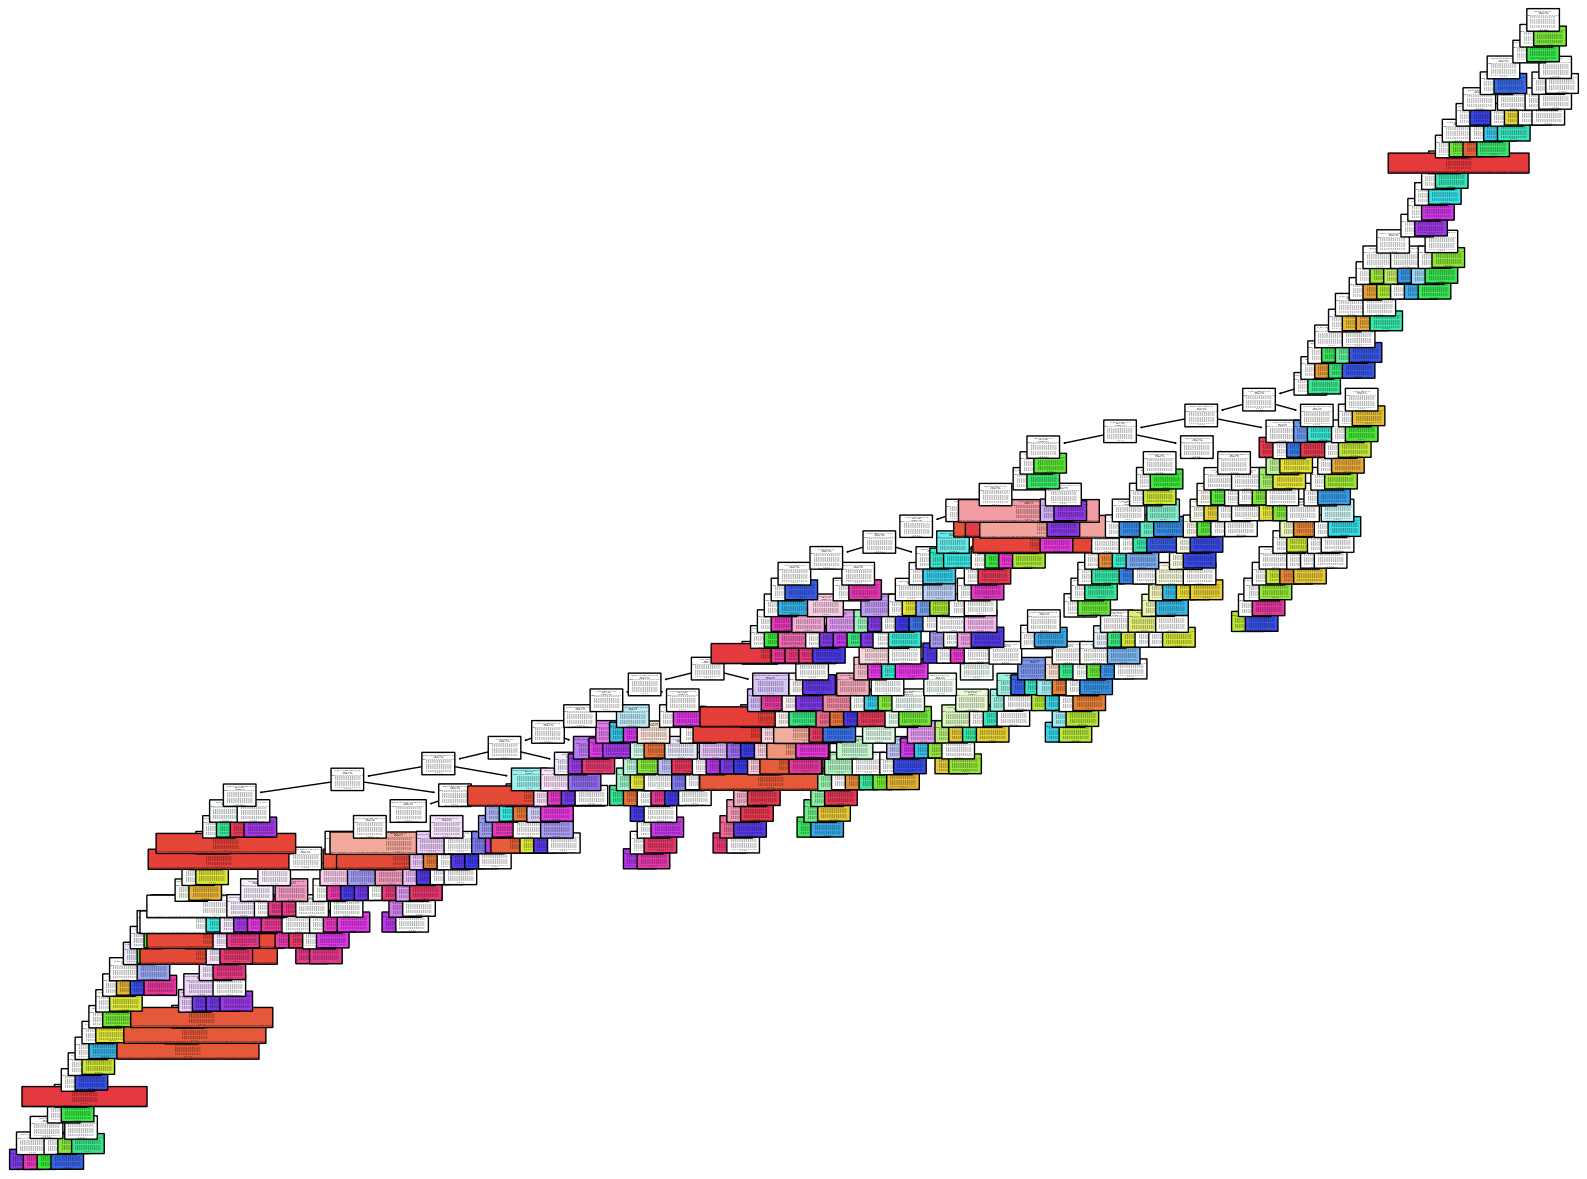

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Fit the model on the entire training set
dtc_model.fit(features, target)

# Get the class names
class_names = list(target.unique())

# Visualize the Decision Tree
plt.figure(figsize=(20, 15))
plot_tree(dtc_model['classifier'], feature_names=dtc_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features), class_names=class_names, filled=True, rounded=True)
plt.show()